## Loss functions
for regression dataset--

1. when you use MSE then use linear as-activation function  (y-y')^2
2. when you use MAE then use linear as-activation function  |y-y'|
3. Hubber loss-(when you have 25% data as outlier..it will behave like both of them)

for classification dataset

4. Binary-cross entropt(when 2 classes and classification dataset)
  --NOTE -- use Sigmoid in output layer as activation function
5. Categorical class enteropy-(multi class ,used in soft max regression)
  --NOTE -- in output layer nourons==categorys as output
6. sparce Categorical class enteropy-(integer encode not on hot encoding of output category)

## Backpropagation
-- Backpropagation(short for backward propagation of errors) is a fundamental algorithm used to train artificial neural networks. It is the method by which the network updates its weights to reduce the prediction error, by propagating the error backwards from the output layer to the input layer.

weight and bais will be changed ...for reduce the loss
-----------------------------------actual data=30 , predicted data=34

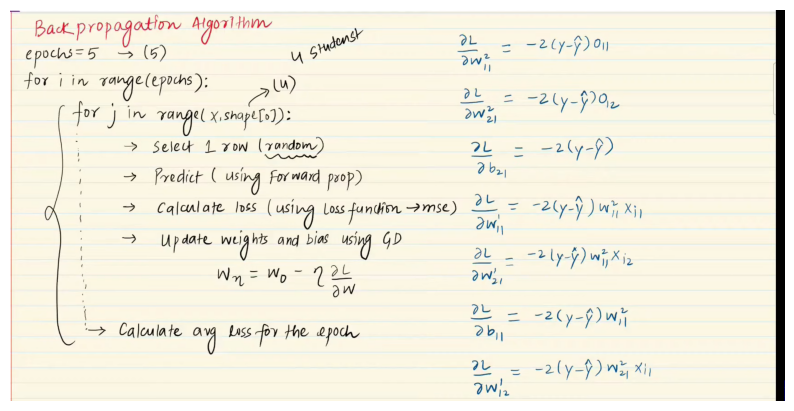

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
image = mpimg.imread('./Screenshot 2025-05-28 112656.png')

# Show the image
plt.figure(figsize=(10,7))
plt.imshow(image)
plt.axis('off')
plt.show()


Regression - https://colab.research.google.com/dri...

Classification - https://colab.research.google.com/dri...

## dataset practice

In [4]:
import numpy as np
import pandas as pd
import time

In [5]:
df = pd.read_csv('./placement.csv')

In [6]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [7]:
df = df[['cgpa','resume_score']]
df.head()

,cgpa,resume_score
0,8.14,6.52
1,6.17,5.17
2,8.27,8.86
3,6.88,7.27
4,7.52,7.30


In [8]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [9]:
X

,cgpa,resume_score
0,8.14,6.52
1,6.17,5.17
2,8.27,8.86
3,6.88,7.27
4,7.52,7.30
...,...,...
95,6.33,6.38
96,8.23,7.76
97,6.65,7.78
98,8.14,5.63


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [11]:
X_scaled.shape

(100, 2)

In [12]:
X_scaled.shape[1]

2

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [14]:
model = Sequential()

model.add(Dense(6,activation='relu',input_dim=X_scaled.shape[1]))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\sachi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

if Batch size=1 it means it will run for all rows in all epchos 20*10000---weught will be updated every time 8000 times

if Batch size=row then it means it will run using all apchos 20

In [16]:
from tensorflow.keras.optimizers import Adam

In [17]:
model.compile(loss='binary_crossentropy',optimizer = Adam(learning_rate=0.001),metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=50,batch_size=1,validation_split=0.2)
#print(time.time() - start)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0000e+00 - loss: -1.4606 - val_accuracy: 0.0000e+00 - val_loss: -4.1982
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -3.8914 - val_accuracy: 0.0000e+00 - val_loss: -7.7424
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -7.4074 - val_accuracy: 0.0000e+00 - val_loss: -12.8835
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -13.2880 - val_accuracy: 0.0000e+00 - val_loss: -20.6284
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -23.2708 - val_accuracy: 0.0000e+00 - val_loss: -32.8092
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -35.1057 - val_accuracy: 0.0000e+00 - val_loss: -50.4291
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -57.1896 - val_accuracy: 0.0000e+00 - val_loss: -76.0622
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0

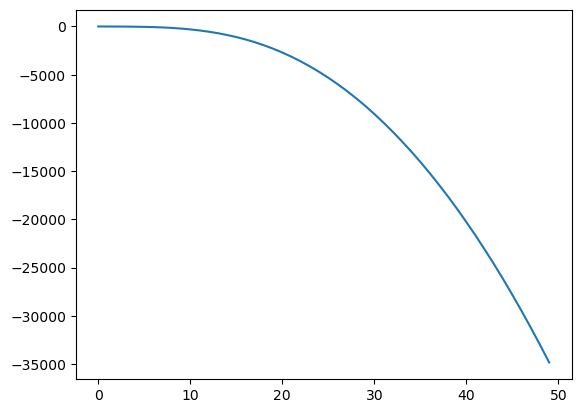

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [19]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\sachi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
from tensorflow.keras.callbacks import EarlyStopping

collback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [24]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=500,batch_size=40,validation_split=0.2,callbacks=collback)
#print(time.time() - start)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 330ms/step - accuracy: 0.0000e+00 - loss: -1936.4132 - val_accuracy: 0.0000e+00 - val_loss: -1648.0980
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.0000e+00 - loss: -1971.6104 - val_accuracy: 0.0000e+00 - val_loss: -1657.1335
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.0000e+00 - loss: -1965.2224 - val_accuracy: 0.0000e+00 - val_loss: -1664.6266
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.0000e+00 - loss: -1911.1229 - val_accuracy: 0.0000e+00 - val_loss: -1671.4264
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.0000e+00 - loss: -1965.9320 - val_accuracy: 0.0000e+00 - val_loss: -1677.7601
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.0000e+00 - loss: -1981.5377 - val_accuracy: 0.0000e+00 - val_loss: -1683.7859
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.0000e+00 - loss: -2014.1970 - val_accuracy: 0.0000e+00 - val_loss: -1689.5842
Epoch

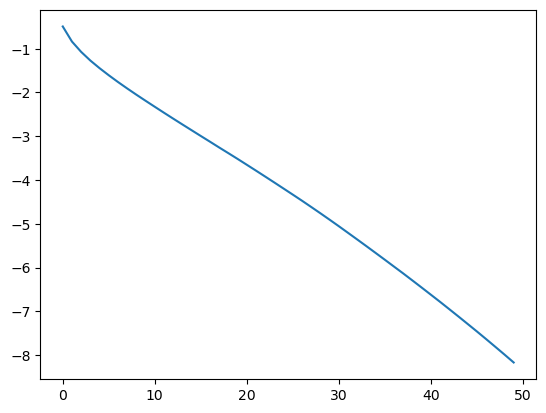

In [22]:
plt.plot(history.history['loss'])